# Bank Churn Prediction

<b>Objective:</b>
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

<b>Context:</b> 

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

<b>Data Description:</b>

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

<b>Data Dictionary:</b>
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?


<b>Points Distribution:</b>
The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
#import tensorflow and check version and successful installation
import tensorflow as tf
print(tf.__version__)

2.4.1


### Read the dataset and Drop the columns which are unique for all users like IDs 

In [3]:
#import data
bank = pd.read_csv('bank.csv')

In [4]:
#view header data
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#drop columns
bank.drop(columns = ['Surname','RowNumber', "CustomerId"], inplace = True)

In [6]:
#ensure columns were properly dropped
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Perform bivariate analysis and give your insights from the same 

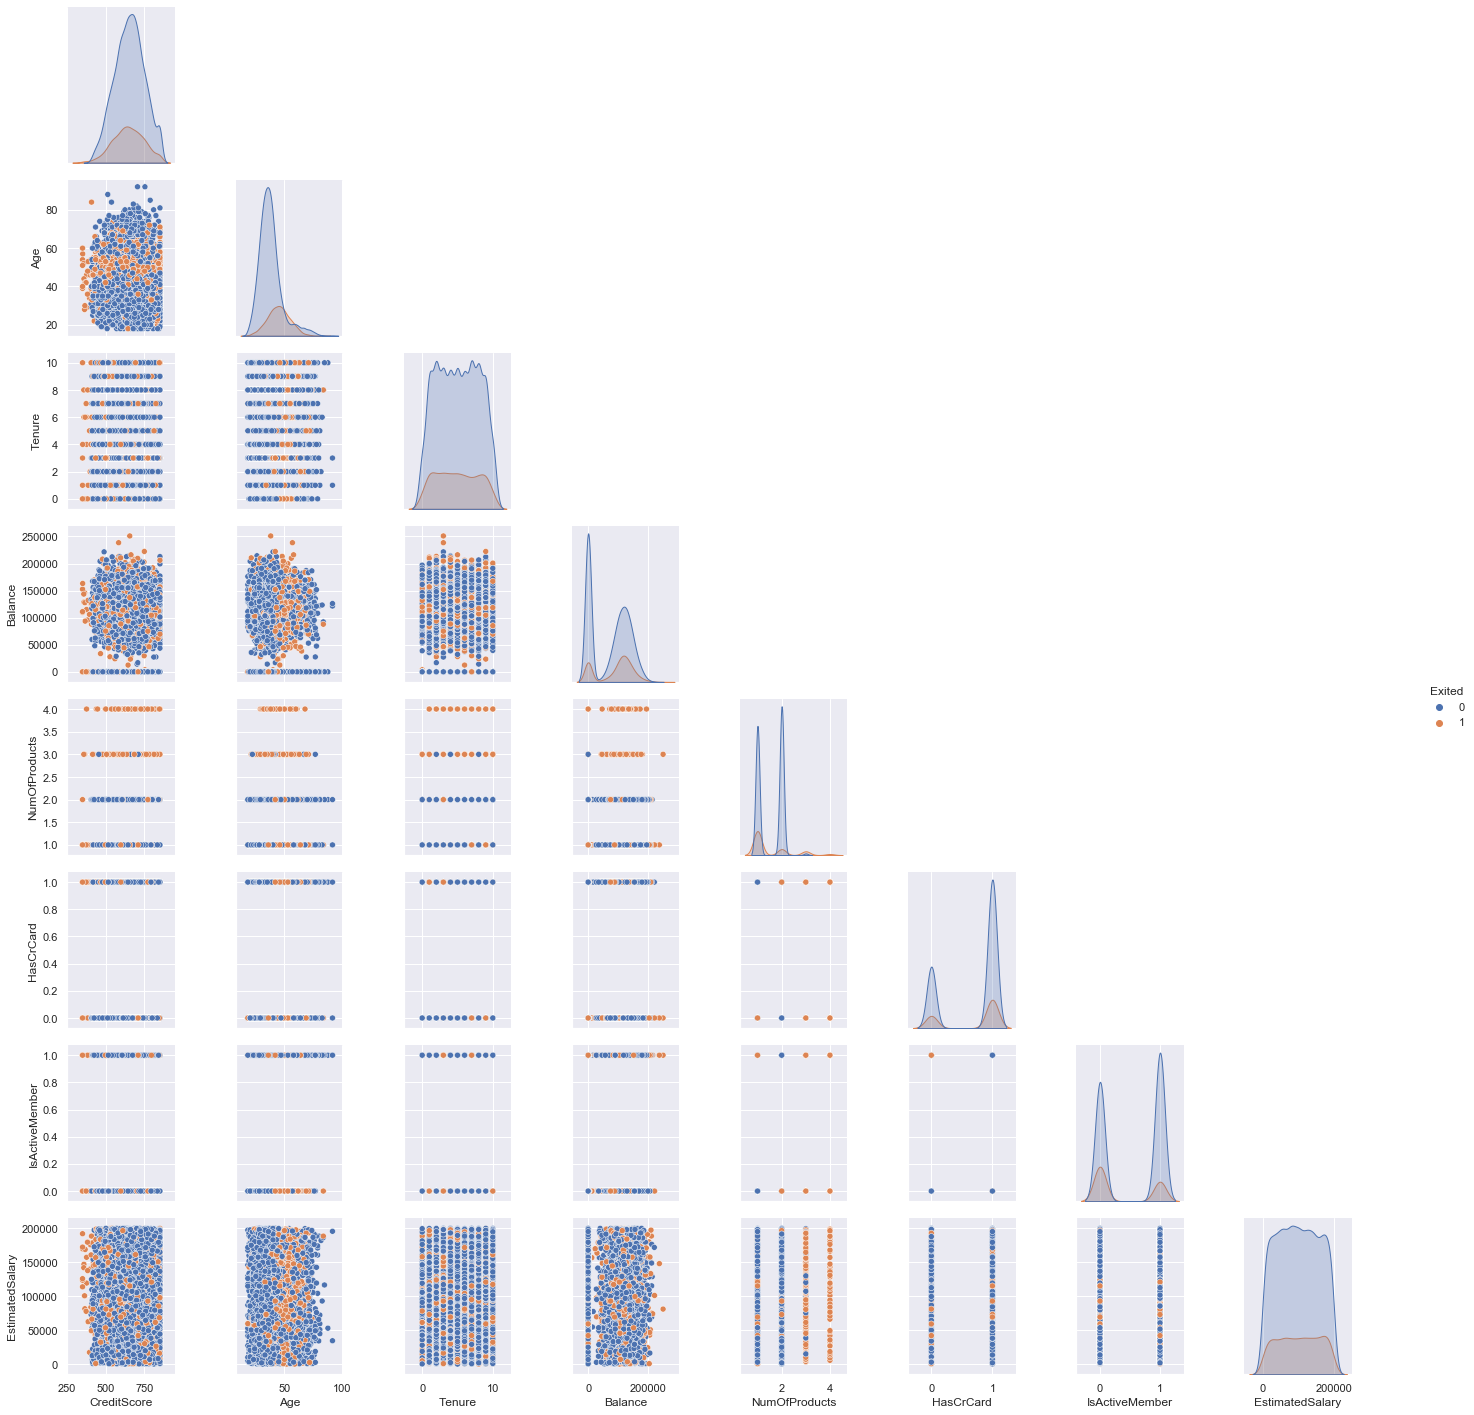

In [7]:
# use pairplot to visualize relationship between variables
sns.pairplot(data = bank, hue = 'Exited', corner = True)
plt.show()

#### Analysis of bivariate data
It's hard to see much correlation between variables or see how specific variables influence the result (exited or no). The histogram data for continuous variables (i.e. age, credit score) is very evenly dispersed, outside of Balance, where there are two peaks - one for lower balance customers and one for higher balance customers. 

### Distinguish the feature and target set and divide the data set into training and test sets 

In [8]:
# split into X and y feature and target sets
X_data = bank.iloc[:,:-1]
y_data = bank['Exited']

display(X_data, y_data)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


0       1
1       0
2       1
3       0
4       0
5       1
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    1
9976    0
9977    0
9978    0
9979    0
9980    0
9981    1
9982    1
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    1
9992    0
9993    0
9994    0
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
# encode X data for categorical variables
X_data = pd.get_dummies(X_data, drop_first = True)
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# import library for train_test_split and divide into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

### Normalize the train and test data 

In [11]:
# import library for preprossing to normalize the data
from scipy.stats import zscore

#import keras and tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import activations


In [12]:
#normalize training data using zscore and assign as new array "X_train_n"
X_train_n = zscore(X_train)
X_train_n

array([[-0.21266528, -0.27558386, -1.0440425 , ..., -0.57691038,
        -0.5780101 , -1.09035226],
       [ 2.07282937, -0.08573178, -0.69981484, ...,  1.73337147,
        -0.5780101 ,  0.9171348 ],
       [-0.03605887,  1.14830677, -1.38827017, ...,  1.73337147,
        -0.5780101 , -1.09035226],
       ...,
       [ 0.34831977, -0.3705099 ,  0.33286815, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ],
       [ 0.369097  , -0.46543595,  1.36555114, ..., -0.57691038,
         1.73007358,  0.9171348 ],
       [ 0.77425287, -1.22484428,  0.33286815, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ]])

In [13]:
#check shape of training and test data for use as input to the neural network
print(X_train_n.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 11) (3000, 11) (7000,) (3000,)


### Initialize & build the model. Identify the points of improvement and implement the same

In [14]:
#initialize the model
model = Sequential()

# add nodes, first layer of relu and finishing with sigmoid for classification
model.add(Dense(64, input_shape = (11,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
# create the optimizer with learning rate of 0.001
sgd = tf.keras.optimizers.Adam(lr = 0.001)

In [16]:
#compile the model using binary crossentropy and previous optimizer
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary() #view resulting dense model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


### Predict the results using 0.5 as a threshold

In [17]:
#fit model and data
model.fit(X_train_n, y_train, batch_size = 100, epochs = 15, verbose = 1)

Epoch 1/15
70/70 [==============================] - 0s 940us/step - loss: 0.6266 - accuracy: 0.6470
Epoch 2/15
70/70 [==============================] - 0s 854us/step - loss: 0.4436 - accuracy: 0.8073
Epoch 3/15
70/70 [==============================] - 0s 838us/step - loss: 0.3973 - accuracy: 0.8381
Epoch 4/15
70/70 [==============================] - 0s 795us/step - loss: 0.3754 - accuracy: 0.8467
Epoch 5/15
70/70 [==============================] - 0s 824us/step - loss: 0.3549 - accuracy: 0.8570
Epoch 6/15
70/70 [==============================] - 0s 838us/step - loss: 0.3445 - accuracy: 0.8652
Epoch 7/15
70/70 [==============================] - 0s 824us/step - loss: 0.3549 - accuracy: 0.8552
Epoch 8/15
70/70 [==============================] - 0s 824us/step - loss: 0.3479 - accuracy: 0.8536
Epoch 9/15
70/70 [==============================] - 0s 838us/step - loss: 0.3412 - accuracy: 0.8594
Epoch 10/15
70/70 [==============================] - 0s 853us/step - loss: 0.3324 - accuracy: 0.8656

In [18]:
#normalize test data
X_test_n = zscore(X_test)

In [19]:
#display results of accuracy and loss
results = model.evaluate(X_test_n, y_test)

94/94 [==============================] - 0s 622us/step - loss: 0.3437 - accuracy: 0.8590


### Print the Accuracy score and confusion matrix

In [20]:
#import metrics from sklearn library
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#print accuracy and loss score
print(model.metrics_names)
print(np.around(results,3))

['loss', 'accuracy']
[0.344 0.859]


In [21]:
# predict y data using normalized X test data
y_predict = model.predict_classes(X_test_n, batch_size = 32, verbose = 1)
X_test_n

94/94 [==============================] - 0s 472us/step


C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ 0.68002068, -0.38216026, -1.38618263, ..., -0.58299561,
         1.77303311,  0.90149255],
       [ 0.2699765 ,  3.1837265 ,  1.06063885, ..., -0.58299561,
        -0.56400526, -1.1092715 ],
       [ 1.40784909, -0.5749109 ,  0.01200108, ..., -0.58299561,
        -0.56400526, -1.1092715 ],
       ...,
       [ 0.36223644, -1.34591344, -1.38618263, ..., -0.58299561,
        -0.56400526,  0.90149255],
       [-1.73923996, -1.05678749,  1.75973071, ..., -0.58299561,
        -0.56400526, -1.1092715 ],
       [ 0.36223644, -0.38216026, -0.33754485, ..., -0.58299561,
        -0.56400526,  0.90149255]])

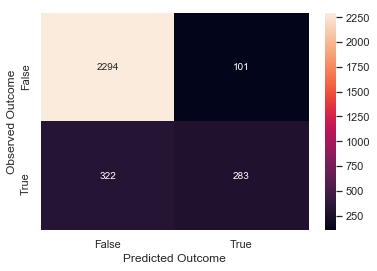

In [22]:
# calculate values for confusion matrix and set as cm array
cm = confusion_matrix(y_test, y_predict)

# plot cm using heatmap from seaborn
sns.heatmap(cm, annot = True, xticklabels = ['False', 'True'], yticklabels = ['False', 'True'], fmt = 'g')
plt.xlabel('Predicted Outcome')
plt.ylabel('Observed Outcome')
plt.show()

In [23]:
#calculate precision, recall, etc.

print('The precision of the model is', precision_score(y_test, y_predict).round(3))
print('The recall of the model is', recall_score(y_test, y_predict).round(3))
print('The f1_score of the model is', f1_score(y_test, y_predict).round(3))

The precision of the model is 0.737
The recall of the model is 0.468
The f1_score of the model is 0.572
